In [8]:
# import 'numpy' to compute high-level mathematics functions 
import numpy as np

# import 'pandas' to perform data manipulation
import pandas as pd

# import 'matplotlib.pyplot' for visualization
import matplotlib.pyplot as plt

# import 'seaborn' for high-level statistical graphics
import seaborn as sns

# to ignore the warnings run the following code
import warnings
warnings.filterwarnings("ignore")

# run below code to convert the 'exponential' values to float
np.set_printoptions(suppress = True)

# import functions from sklearn to perform clustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN

# import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

# import various functions from sklearn 
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

In [9]:
df=pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

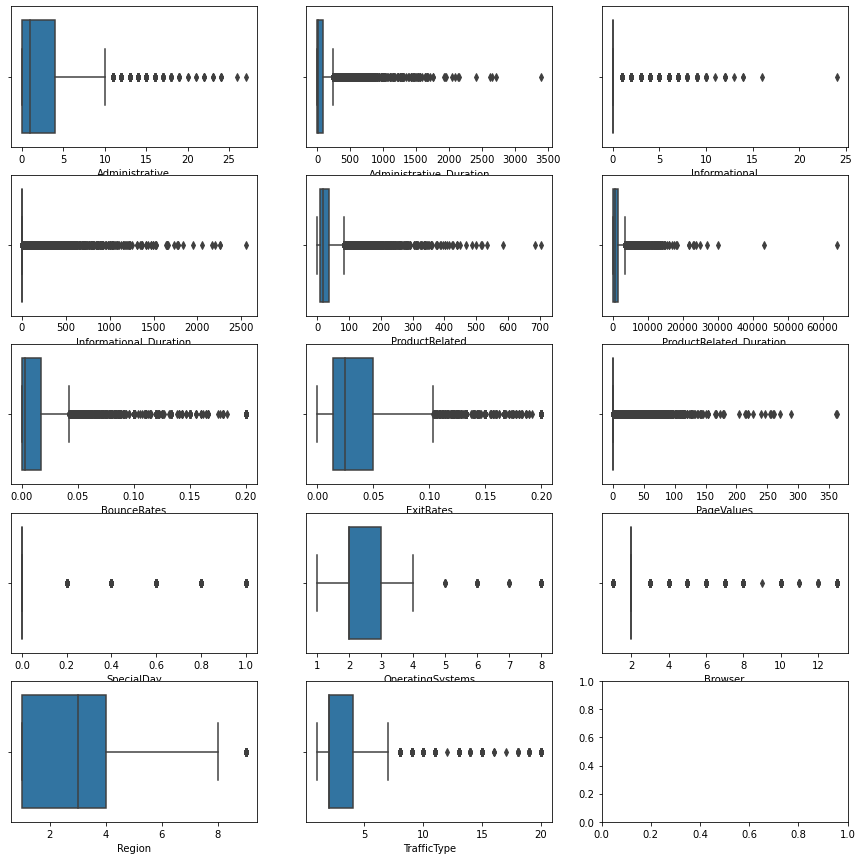

In [11]:
#No missing values 
df_num=df.select_dtypes(include=np.number)
fig,ax=plt.subplots(nrows=5, ncols=3, figsize=(15,15))
for col,sub in zip(df_num.columns, ax.flatten()):
    sns.boxplot(df[col], ax=sub)
plt.show()

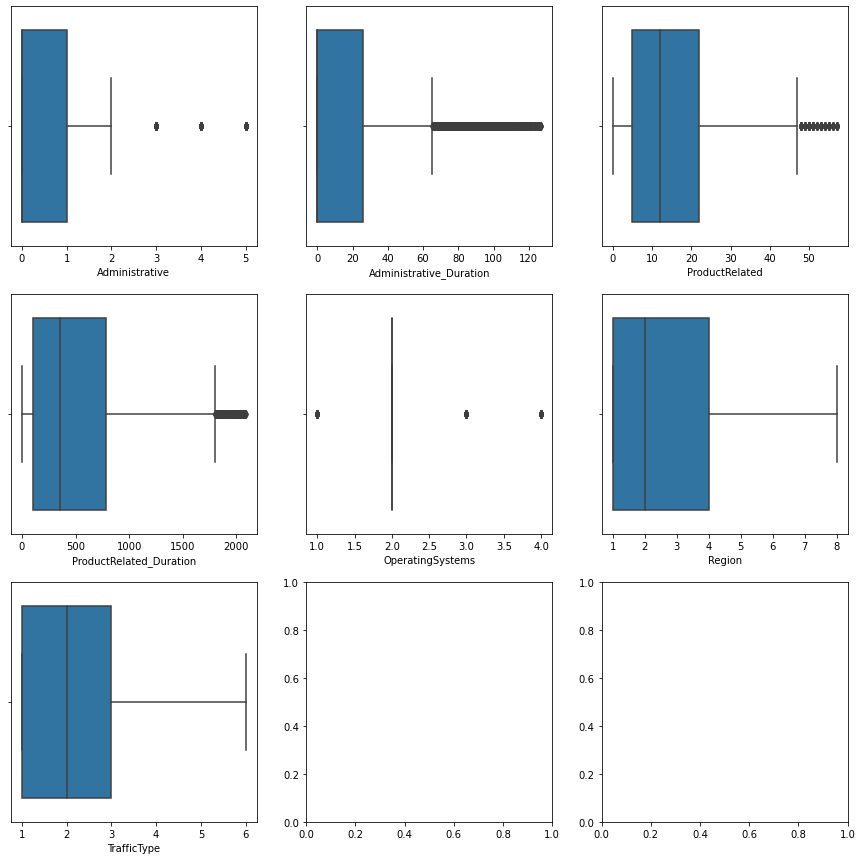

In [59]:
#data types are correct 
#There are outliers in numerical columns, removing them through IQR method
# q1=df_num.quantile(0.25)
# q3=df_num.quantile(0.75)
# iqr=q3-q1
# df=df[~((df>(q3+1.5*iqr))|(df<(q1-1.5*iqr))).any(axis=1)]

#final check
fig,ax=plt.subplots(nrows=3, ncols=3, figsize=(15,15))
for col,sub in zip(df_num.columns, ax.flatten()):
    sns.boxplot(df[col], ax=sub)
plt.show()

In [27]:
# df[df_num.columns]=df_num.copy()


In [60]:
df.var()[df.var()<0.1].index
#dropping them dur to less variance
df.drop(['Informational', 'Informational_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'Browser'], axis=1, inplace=True)
df.shape

(6383, 11)

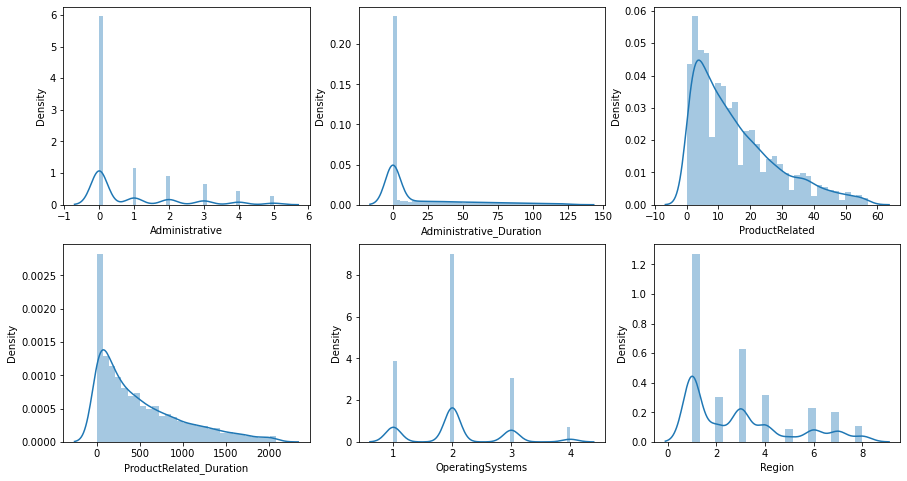

In [61]:
df_num=df.select_dtypes(include=np.number)
fig,ax=plt.subplots(nrows=2, ncols=3, figsize=(15,8))
for col,sub in zip(df_num.columns, ax.flatten()):
    sns.distplot(df[col], ax=sub)
plt.show()

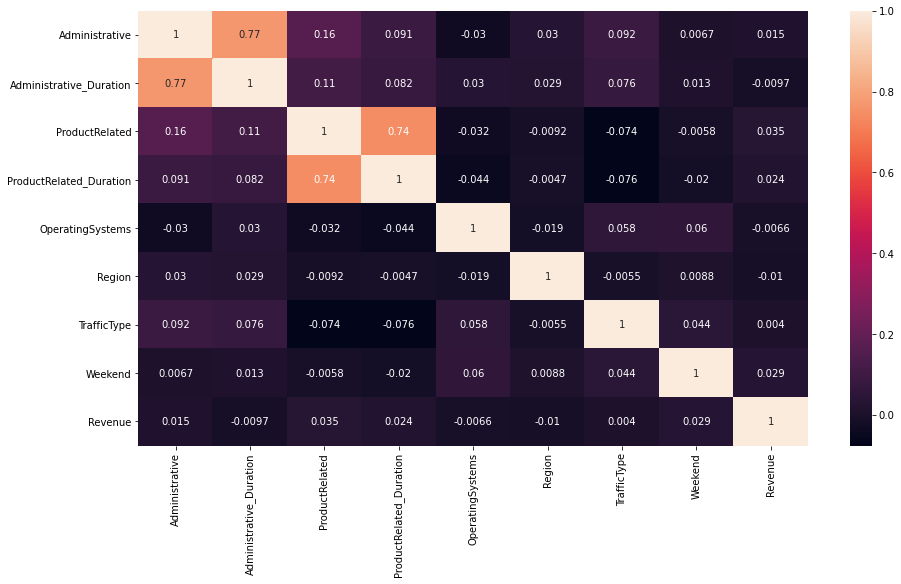

In [51]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

#There is some multicollinearity

In [67]:
#dummy variable encoding
df.head()

,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,Month,OperatingSystems,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,1,0.000000,Feb,1,1,1,Returning_Visitor,False,False
1,0,0.0,2,64.000000,Feb,2,1,2,Returning_Visitor,False,False
3,0,0.0,2,2.666667,Feb,3,2,4,Returning_Visitor,False,False
4,0,0.0,10,627.500000,Feb,3,1,4,Returning_Visitor,True,False
5,0,0.0,19,154.216667,Feb,2,1,3,Returning_Visitor,False,False


In [76]:
cat_cols=df.select_dtypes(exclude=np.number)
#month is not required, dropping it
#rest of them , we will dummy encode them
df.drop('Month',axis=1, inplace=True)
df=pd.get_dummies(data=df,columns=['VisitorType','Weekend','Revenue'])
df.head()

,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,OperatingSystems,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True,Revenue_False,Revenue_True
0,0,0.0,1,0.000000,1,1,1,0,0,1,1,0,1,0
1,0,0.0,2,64.000000,2,1,2,0,0,1,1,0,1,0
3,0,0.0,2,2.666667,3,2,4,0,0,1,1,0,1,0
4,0,0.0,10,627.500000,3,1,4,0,0,1,0,1,1,0
5,0,0.0,19,154.216667,2,1,3,0,0,1,1,0,1,0


In [77]:
#scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
df[df.columns]=scale.fit_transform(df[df.columns])
df.head()

,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,OperatingSystems,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True,Revenue_False,Revenue_True
0,-0.627976,-0.571439,-1.114825,-1.024636,-1.357856,-0.897886,-1.119656,-0.409069,-0.05881,0.414793,0.541194,-0.541194,0.369833,-0.369833
1,-0.627976,-0.571439,-1.037579,-0.895966,-0.047028,-0.897886,-0.345610,-0.409069,-0.05881,0.414793,0.541194,-0.541194,0.369833,-0.369833
3,-0.627976,-0.571439,-1.037579,-1.019275,1.263800,-0.423841,1.202481,-0.409069,-0.05881,0.414793,0.541194,-0.541194,0.369833,-0.369833
4,-0.627976,-0.571439,-0.419616,0.236934,1.263800,-0.897886,1.202481,-0.409069,-0.05881,0.414793,-1.847768,1.847768,0.369833,-0.369833
5,-0.627976,-0.571439,0.275593,-0.714588,-0.047028,-0.897886,0.428436,-0.409069,-0.05881,0.414793,0.541194,-0.541194,0.369833,-0.369833


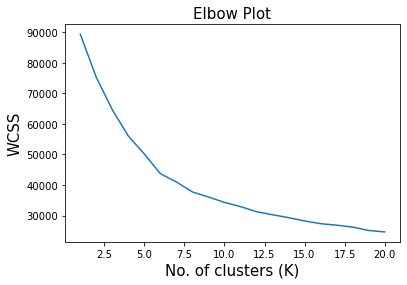

In [80]:
X=df.copy()
#applying kmeans 
wcss  = []
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,21), wcss)
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# display the plot
plt.show()

#not clear maybe 6

In [82]:
n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(X)
    score = silhouette_score(X, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.29471718579742956)
For 3 clusters the silhouette score is 0.266430070882139)
For 4 clusters the silhouette score is 0.28495677990907864)
For 5 clusters the silhouette score is 0.24561051834160003)
For 6 clusters the silhouette score is 0.2533976196724753)
For 7 clusters the silhouette score is 0.26765178555894004)
For 8 clusters the silhouette score is 0.2463469563199281)
For 9 clusters the silhouette score is 0.21160630515580064)
For 10 clusters the silhouette score is 0.2275099223271207)


In [86]:
#checking another way
# instantiate linkage object with scaled data and consider 'ward' linkage method 
link_mat = linkage(X, method = 'ward')     

# print first 10 observations of the linkage matrix 'link_mat'
print(link_mat[0:10])

[[   0.  858.    0.    2.]
 [3984. 4516.    0.    2.]
 [   5.  355.    0.    2.]
 [1540. 2798.    0.    2.]
 [3168. 6386.    0.    3.]
 [4312. 6387.    0.    4.]
 [  14. 1401.    0.    2.]
 [1001. 2089.    0.    2.]
 [3313. 6390.    0.    3.]
 [5861. 6391.    0.    4.]]


In [88]:
# # plot the dendrogram
# # pass the linkage matrix
# dendro = dendrogram(link_mat)

# for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    
#     # consider 'x' as the x-coordinate of the average distance on the merging line
#     x = sum(i[1:3])/2
    
#     # consider 'y' as the distance at which the merging occurs 
#     y = d[1]
    
#     # pass the if-condition for annotation
#     if y > 20:
        
#         # plot the bullet and annotate the merging distance 'y'
#         plt.plot(x, y, 'o', c=c)
        
#         # pass the conditions to annotate the distance
#         plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')

# # plot the line to cut the dendrogram
# plt.axhline(y = 100)

# plt.title('Dendrogram', fontsize = 15)
# plt.xlabel('Index', fontsize = 15)
# plt.ylabel('Distance', fontsize = 15)

# # display the plot
# plt.show()

In [89]:
# calculate the euclidean distance between the observations 
eucli_dist = euclidean_distances(X)
dist_array = eucli_dist[np.triu_indices(6383, k = 1)]

coeff, cophenet_dist = cophenet(link_mat, dist_array)

# print the cophenetic correlation coefficient
print(coeff)

0.6718142487564855


In [90]:
# instantiate clustering method with 2 clusters and 'ward' linkage method
clusters = AgglomerativeClustering(n_clusters=2, linkage='ward')

# fit the model on the scaled data
clusters.fit(X)

AgglomerativeClustering()

In [91]:
# add a column containing cluster number to the original data
df_num['Cluster'] = clusters.labels_

# print head() of the newly formed dataframe
df_num.head()

,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,OperatingSystems,Region,TrafficType,Cluster
0,0,0.0,1,0.000000,1,1,1,1
1,0,0.0,2,64.000000,2,1,2,1
3,0,0.0,2,2.666667,3,2,4,1
4,0,0.0,10,627.500000,3,1,4,1
5,0,0.0,19,154.216667,2,1,3,1


In [93]:
df_num['Cluster'].value_counts()

1    4918
0    1465
Name: Cluster, dtype: int64

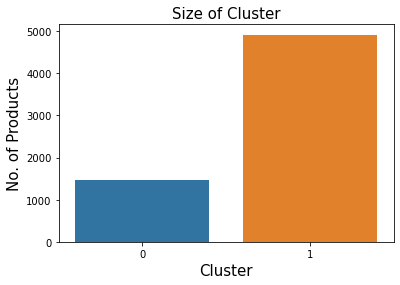

In [95]:
sns.countplot(data = df_num, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('No. of Products', fontsize = 15)

# display the plot
plt.show()

In [101]:
df_num[df_num.Cluster==0].describe()

,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,OperatingSystems,Region,TrafficType,Cluster
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.0
mean,1.455973,31.815074,17.030717,585.083411,2.004096,2.914676,2.567918,0.0
std,1.536311,36.002700,12.530499,482.917293,0.730846,2.146342,1.210014,0.0
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.0
25%,0.000000,0.000000,7.000000,197.500000,2.000000,1.000000,2.000000,0.0
50%,1.000000,19.100000,14.000000,464.000000,2.000000,2.000000,2.000000,0.0
75%,3.000000,58.000000,24.000000,864.458333,2.000000,4.000000,3.000000,0.0
max,5.000000,126.500000,57.000000,2075.983333,4.000000,8.000000,6.000000,0.0


In [102]:
df_num[df_num.Cluster==1].describe()

,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,OperatingSystems,Region,TrafficType,Cluster
count,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.0
mean,0.677308,13.633830,14.956080,487.179666,2.045344,2.887963,2.410329,1.0
std,1.253094,28.261512,13.031591,499.529175,0.772057,2.098803,1.313403,0.0
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.0
25%,0.000000,0.000000,4.000000,83.437500,2.000000,1.000000,1.000000,1.0
50%,0.000000,0.000000,11.000000,314.833333,2.000000,3.000000,2.000000,1.0
75%,1.000000,9.400000,22.000000,750.897619,2.000000,4.000000,3.000000,1.0
max,5.000000,127.000000,57.000000,2086.242857,4.000000,8.000000,6.000000,1.0


In [103]:
#using PCA


# train test split
from sklearn.model_selection import train_test_split

# 'StandardScalar' from sklearn.preprocessing library is used to scale the data
from sklearn.preprocessing import StandardScaler

# 'eig' from numpy.linalg to calculate eigenvalues and eigenvectors
from numpy.linalg import eig

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA

# 'LDA' function to perform linear discriminant analysis using the sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# import decision tree classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [105]:
pca = PCA(n_components = 0.95, random_state = 10)

# the 'fit_transform()' fits the PCA on the data transforms the data to compute the principal components 
# pass the standardized data to fit PCA
components = pca.fit_transform(df)
components.shape

#2 columns eliminated

(6383, 9)

In [106]:
df_pca = pd.DataFrame(data = components, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8', 'PC9'])

# head() to display top five rows of the transformed data
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-1.791848,-0.721737,0.572976,0.453980,-0.475388,0.568489,1.245602,-0.610159,-1.174027
1,-1.710929,-0.690882,0.438918,0.384803,-0.365510,-0.283542,0.426495,0.223967,-0.726065
2,-1.659411,-0.723761,0.496056,0.309652,-0.540465,-1.333866,-0.633246,0.940968,0.524712
3,-0.445799,2.550688,0.959439,0.338392,0.216752,-1.705420,-0.165268,1.049952,0.391388
4,-1.299419,-0.484848,-0.189967,0.165061,0.142309,-0.785579,0.591269,0.174679,-0.008076
